## Job Dataset

Dataset is obtained from:

https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\powel\\Dropbox\\data analyses'

In [3]:
# find files in path
import glob

#filePath = 'C:/Users/powel/OneDrive/Desktop/*'

#for name in glob.glob(filePath):
#    print(name)

In [4]:
import zipfile

filePath = 'C:/Users/powel/OneDrive/Desktop/'

#with zipfile.ZipFile(filePath+'job_dataset_kaggle.zip', 'r') as zip_ref:
#    zip_ref.extractall(filePath+'datasets/job_descriptions')

In [5]:
import pandas as pd

df = pd.read_csv(filePath+'datasets/job_descriptions/job_descriptions.csv')

In [6]:
len(df)

1615940

### Examine the dataset

In [7]:
df.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

In [8]:
df.Experience.value_counts().tail(5)

2 to 15 Years    33390
4 to 9 Years     33384
3 to 10 Years    33378
4 to 13 Years    33374
0 to 10 Years    33341
Name: Experience, dtype: int64

In [9]:
df.Qualifications.value_counts()

BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
MBA       161537
B.Tech    161443
M.Com     161396
B.Com     161298
MCA       160866
Name: Qualifications, dtype: int64

In [10]:
df['Salary Range'].value_counts()

$59K-$88K     3043
$58K-$101K    3038
$62K-$82K     3033
$61K-$106K    3025
$61K-$112K    3015
              ... 
$55K-$110K    2731
$63K-$117K    2727
$58K-$129K    2724
$63K-$102K    2722
$62K-$121K    2717
Name: Salary Range, Length: 561, dtype: int64

In [11]:
df['Company Size'].value_counts()

83541     31
58998     30
15838     30
100013    30
96377     29
          ..
82130      2
99576      2
55188      2
101119     1
101368     1
Name: Company Size, Length: 122188, dtype: int64

In [12]:
df['Job Posting Date'].value_counts()

2021-11-14    2378
2022-03-08    2339
2023-05-24    2332
2023-08-20    2327
2023-05-28    2327
              ... 
2022-11-29    2100
2021-11-16    2096
2022-02-13    2088
2022-08-19    2072
2022-05-28    2071
Name: Job Posting Date, Length: 731, dtype: int64

In [13]:
df['Work Type'].value_counts()

Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: Work Type, dtype: int64

In [14]:
df['Role'].value_counts()

Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: Role, Length: 376, dtype: int64

In [15]:
df['Country'].value_counts()

Malta            7723
Venezuela, RB    7694
Somalia          7689
Sierra Leone     7656
Vietnam          7649
                 ... 
Ghana            7312
Ukraine          7307
Iceland          7292
Uganda           7290
Lithuania        7273
Name: Country, Length: 216, dtype: int64

In [16]:
df['Company'].value_counts()

DTE Energy                            1957
Berry Global Group                    1941
Marsh & McLennan                      1941
Vistra                                1938
International Flavors & Fragrances    1928
                                      ... 
Textron                               1714
Marriott International                1712
Wayfair                               1702
Lumen Technologies                    1699
Siemens AG                            1678
Name: Company, Length: 888, dtype: int64

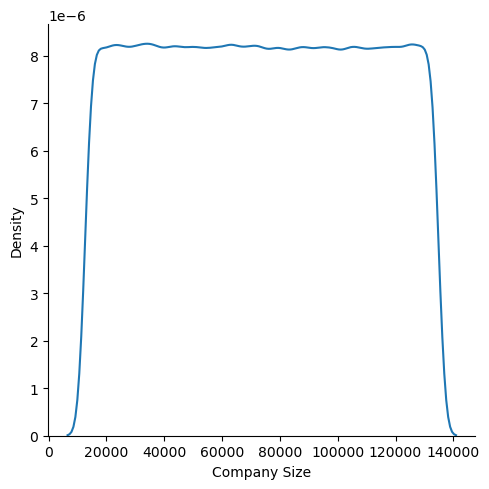

In [17]:
# Company Size
sns.displot(data = df, x='Company Size', kind="kde")
plt.show()

In [18]:
## Examine and extract Company Profile column

### Extract necessary columns

In [59]:
df2  = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
          'Role', 'Company']]

df2.head(5)

,Experience,Qualifications,Salary Range,Country,latitude,longitude,Work Type,Company Size,Role,Company
0,5 to 15 Years,M.Tech,$59K-$99K,Isle of Man,54.2361,-4.5481,Intern,26801,Social Media Manager,Icahn Enterprises
1,2 to 12 Years,BCA,$56K-$116K,Turkmenistan,38.9697,59.5563,Intern,100340,Frontend Web Developer,PNC Financial Services Group
2,0 to 12 Years,PhD,$61K-$104K,"Macao SAR, China",22.1987,113.5439,Temporary,84525,Quality Control Manager,United Services Automobile Assn.
3,4 to 11 Years,PhD,$65K-$91K,Benin,9.3077,2.3158,Full-Time,129896,Wireless Network Engineer,Hess
4,1 to 12 Years,MBA,$64K-$87K,Chile,-35.6751,-71.5429,Intern,53944,Conference Manager,Cairn Energy


In [60]:
# Check for NAs
row_has_NaN = df2.isnull().any(axis=1)
rows_with_NaN = df2[row_has_NaN]
#rows_without_NaN = df2[-row_has_NaN]
len(rows_with_NaN)

0

### sub-sample the dataset for training

In [61]:
num_sample_per_value = 50
subset_ind = np.array([])
category_cols = ['Qualifications', 'Country', 'Work Type', 'Role', 'Company']
for i in range(len(category_cols)):
    subset_ind = np.append(subset_ind, 
                           np.array(df2.groupby(category_cols[i]).sample(n=num_sample_per_value).index.values))
print(len(subset_ind))
# remove duplicates
subset_ind = np.unique(subset_ind)
print(len(subset_ind))

74750
73798


In [62]:
# Extract the necessary rows
df2 = df2.iloc[subset_ind,:]
print(len(df2))
print(len(df2.columns))

73798
10


In [63]:
df2['Role'].value_counts()

Interaction Designer            714
Network Administrator           664
Procurement Analyst             573
User Interface Designer         540
User Experience Designer        525
                               ... 
Procurement Coordinator         147
Machine Learning Engineer       145
Data Quality Analyst            145
Construction Project Manager    142
Technical Support Specialist    139
Name: Role, Length: 376, dtype: int64

In [24]:
# Extract information from range data

# method 1
#df2['ind1'] = df2['Experience'].str.find(' to ')
#df2['ind2'] = df2['Experience'].str.find(' Years')
#df2.test = df2.apply(lambda x: x['Experience'][0:x['ind1']], axis=1)
#print(df2.test)

# method 2
#ind1 = df2['Experience'].str.find(' to ')
#ind2 = df2['Experience'].str.find(' Years')
#test = [data[0:x] for data,x in zip(df2.Experience[0:100],ind1)]
#print(test)

# method 3: str.split
#temp = df2.Experience.str.split('to|Years', expand=True)
#print(temp)

### Extract info from range values

In [25]:
# experience
exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
exp_df = exp_df.astype(int)
#exp_df.loc[:,'EXP LB'] = exp_df.iloc[:,0]
#exp_df.loc[:,'EXP UB'] = exp_df.iloc[:,1]
print(exp_df)

         EXP LB  EXP UB
138           4      14
274           2      10
309           3       9
414           5       9
424           5      10
...         ...     ...
1615724       1      15
1615854       3      15
1615868       5      11
1615885       2      13
1615917       2      11

[29754 rows x 2 columns]


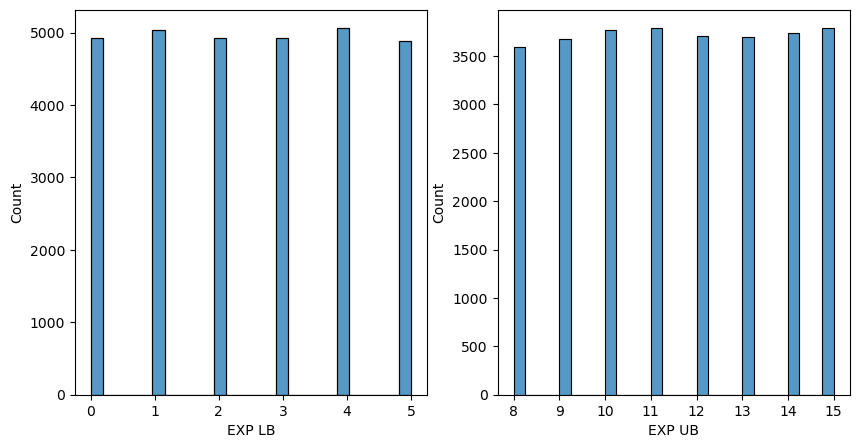

In [26]:
# Plot the experience LB and UB
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=exp_df, x='EXP LB', ax=ax[0])
sns.histplot(data=exp_df, x='EXP UB', ax=ax[1])
plt.show()

In [27]:
# salary
salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000
#mid_salary = mid_salary.to_frame(name='Mid Salary')
print(salary_df)

        0    1 2  3     4 5   Mid Salary
138         56         92        74000.0
274         57         92        74500.0
309         64        107        85500.0
414         64        114        89000.0
424         61        120        90500.0
...     ..  .. .. ..  ... ..         ...
1615724     55        103        79000.0
1615854     56        122        89000.0
1615868     61        127        94000.0
1615885     65        126        95500.0
1615917     57         83        70000.0

[29754 rows x 7 columns]


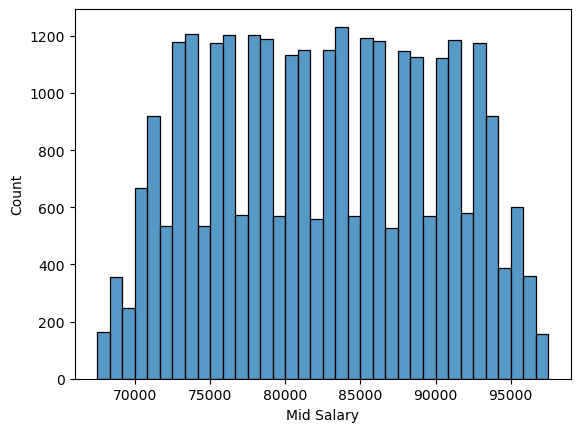

In [28]:
# Plot the mid salary
sns.histplot(salary_df['Mid Salary'])
plt.show()

In [29]:
df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                exp_df[['EXP LB', 'EXP UB']],
                salary_df['Mid Salary']], 
                axis=1)
display(df3.head(5))

,Qualifications,Country,latitude,longitude,Work Type,Company Size,Role,Company,EXP LB,EXP UB,Mid Salary
138,B.Tech,Russia,61.5240,105.3188,Full-Time,127707,Investment Analyst,Aflac,4,14,74000.0
274,PhD,Poland,51.9194,19.1451,Temporary,128274,Database Developer,Truist Financial,2,10,74500.0
309,B.Tech,Djibouti,11.8251,42.5903,Full-Time,25306,Project Coordinator,Freeport-McMoRan,3,9,85500.0
414,MCA,Gambia,13.4432,-15.3101,Part-Time,94351,Marketing Analytics Specialist,United Airlines Holdings,5,9,89000.0
424,BCA,Myanmar,21.9162,95.9560,Full-Time,67249,Key Account Manager,WestRock,5,10,90500.0


In [30]:
df3.dtypes

Qualifications     object
Country            object
latitude          float64
longitude         float64
Work Type          object
Company Size        int64
Role               object
Company            object
EXP LB              int32
EXP UB              int32
Mid Salary        float64
dtype: object

### one-hot encode categorical data

In [44]:
# One-hot encode the "color" column
one_hot = pd.get_dummies(df3.select_dtypes(include='object')).astype('category')

In [45]:
print(len(one_hot))
print(len(one_hot.columns))

29747
1495


In [46]:
# number of numerical columns
print('Number of numerical columns: {}'.format(
    len(df3.select_dtypes(include='number').columns)
))

Number of numerical columns: 6


In [47]:
# Merge the categorical (one-hot) data to the numerical data

df4 = pd.concat([df3.select_dtypes(include='number'),
                 one_hot], axis=1)
print(len(df4.columns))

1501


In [48]:
# train test split
from sklearn.model_selection import train_test_split

X = df4.drop(['Mid Salary'], axis=1)
y = df4.loc[:,'Mid Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)

In [49]:
#X_train.reset_index().select_dtypes(include='object')
print( len(X_train.select_dtypes(include='number').columns) )

5


In [50]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='category')

scaler = StandardScaler().fit(X_train_numerical)

In [99]:
# Scaling X_train
X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                     X_train_categorical.astype('bool')], axis=1, ignore_index=False)

In [100]:
X_train_scaled.dtypes

latitude                                 float64
longitude                                float64
Company Size                             float64
EXP LB                                   float64
EXP UB                                   float64
                                          ...   
Company_Xiaomi Corporation                  bool
Company_Yum China Holdings                  bool
Company_ZTE Corporation                     bool
Company_Zee Entertainment Enterprises       bool
Company_Zoetis                              bool
Length: 1500, dtype: object

In [82]:
display(X_train_scaled.head(5))

,latitude,longitude,Company Size,EXP LB,EXP UB,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,-0.256847,-1.064969,0.128546,-1.453567,0.220286,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.458550,-0.393532,-1.061701,-0.869415,0.220286,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.712338,-0.025851,-1.417401,0.298890,0.220286,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.432069,-0.105981,0.375009,-1.453567,0.658666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.748739,-0.083593,-1.066981,-1.453567,0.658666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Scaling X_test
X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='category')
X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                     X_test_categorical.astype('bool')], axis=1, ignore_index=False)

In [102]:
display(X_test_scaled.tail(5))

,latitude,longitude,Company Size,EXP LB,EXP UB,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
5943,-0.092065,-1.096644,-1.175025,0.883042,-1.094852,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5944,0.542511,0.267360,1.642669,-1.453567,-1.533232,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5945,-0.146495,-1.496363,0.532136,-0.869415,-1.533232,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5946,-1.709892,2.100257,-0.344311,1.467194,1.535425,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5947,0.841295,0.267502,0.590530,0.883042,-0.656473,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
y_train_resetIndex = y_train.reset_index(drop=True)
y_test_resetIndex = y_test.reset_index(drop=True)

In [78]:
import time

start_time = time.time()
print("time taken : {}".format(time.time()-start_time))

time taken : 0.0005047321319580078


In [129]:
# XGBOOST Regressor

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import time

#xgb_model = xgb.XGBRegressor(objective="reg:squarederror",  #enable_categorical=True,
#                             random_state=1234,
#                            n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

dtrain = xgb.DMatrix(X_train_scaled, label=y_train_resetIndex)
watchlist = [(dtrain, 'train')]
params = {"booster":"gblinear",
    "objective":"reg:squarederror", 'max_depth': 6, 'learning_rate': 0.1}

start_time = time.time()

#xgb_model.fit(X_train_scaled, 
#             y_train_resetIndex)

xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)

print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[14:20:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[0]	train-rmse:44342.84628
[1]	train-rmse:24368.39883
[2]	train-rmse:14396.51409
[3]	train-rmse:9926.58201
[4]	train-rmse:8226.18857
[5]	train-rmse:7666.51142
[6]	train-rmse:7486.33084
[7]	train-rmse:7421.93677
[8]	train-rmse:7392.82663
[9]	train-rmse:7375.50164
time taken : 0.03 min


In [130]:
# model evaluation with test set
dtest = xgb.DMatrix(X_test_scaled, label=y_test_resetIndex)
y_pred = xg_reg.predict(dtest)
mse=mean_squared_error(y_test_resetIndex, y_pred)
print(np.sqrt(mse))

7699.172876976772


“The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature's contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction

In [137]:
#xg_reg.get_score(importance_type='gain')

xg_reg.get_score(importance_type='weight')
# ‘weight’: the number of times a feature is used to split the data across all trees.
# the number of occurrences of the feature in splits: integers greater than 0 (features not participating in splits are omitted)

{'latitude': -2.438321590423584,
 'longitude': 24.023223876953125,
 'Company Size': -13.321983337402344,
 'EXP LB': -10.29898452758789,
 'EXP UB': -6.8708882331848145,
 'Qualifications_B.Com': 15567.921875,
 'Qualifications_B.Tech': 15386.857421875,
 'Qualifications_BA': 15429.865234375,
 'Qualifications_BBA': 15556.3056640625,
 'Qualifications_BCA': 15213.6015625,
 'Qualifications_M.Com': 15267.0751953125,
 'Qualifications_M.Tech': 15272.68359375,
 'Qualifications_MBA': 15330.396484375,
 'Qualifications_MCA': 15258.451171875,
 'Qualifications_PhD': 15418.7392578125,
 'Country_Afghanistan': 13336.76171875,
 'Country_Albania': 13416.701171875,
 'Country_Algeria': 13277.171875,
 'Country_American Samoa': 12254.9892578125,
 'Country_Andorra': 13807.345703125,
 'Country_Angola': 12827.5947265625,
 'Country_Antigua and Barbuda': 12843.5234375,
 'Country_Argentina': 12186.892578125,
 'Country_Armenia': 13162.9970703125,
 'Country_Aruba': 13551.2861328125,
 'Country_Australia': 13572.02832031

In [179]:
# ranking the values and pick the top features
feature_weights = xg_reg.get_score(importance_type='weight')
#print(type(feature_weights))
#print(feature_weights['Role_Frontend Developer'])
#sorted(feature_weights, key=feature_weights.get, reverse=True)

feature_weights = pd.DataFrame.from_dict(feature_weights, 
                                         orient='index', 
                                         columns=['Weight']).reset_index(names=['Feature Name'])
# sort the weight in descending order
top_cols = feature_weights.sort_values(['Weight'], ascending=False).iloc[:100,0]
#print(type(top_cols))

# extract the features in the top 200
#print(top_cols.str.split(pat='_', expand=True)[0].unique())



In [180]:
# xgb_model.feature_importances_

In [184]:
# Run the model again but with top_cols features plus the original numerical columns
feature_cols = np.concatenate([X_train_scaled.select_dtypes(include='number').columns.values,
                      top_cols.values])


dtrain = xgb.DMatrix(X_train_scaled.loc[:,feature_cols], label=y_train_resetIndex)
watchlist = [(dtrain, 'train')]
params = {"booster":"gblinear",
    "objective":"reg:squarederror", 
    'max_depth': 6, 
    'learning_rate': 0.3}

start_time = time.time()

#xgb_model.fit(X_train_scaled, 
#             y_train_resetIndex)

xg_reg2 = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)

print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[15:06:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[0]	train-rmse:39965.84362
[1]	train-rmse:21042.10293
[2]	train-rmse:13094.37039
[3]	train-rmse:9936.09343
[4]	train-rmse:8660.75105
[5]	train-rmse:8097.06555
[6]	train-rmse:7819.91206
[7]	train-rmse:7674.18744
[8]	train-rmse:7595.54239
[9]	train-rmse:7552.28048
time taken : 0.00 min


In [208]:
# Grid Search
param_grid = {
    "objective":["reg:squarederror"],
    #"booster":["gblinear"],
    # Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features
    #'colsample_bytree': [1],
    #'gamma': [0.1, 0.3, 0.5],
    'learning_rate': [0.05, 0.1, 0.3],
    "max_depth": [5],
    "n_estimators": [50, 100, 150],
    #"subsample": [1] # range 0 to 1
}

start_time = time.time()
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1234))
grid_search.fit(X_train_scaled, y_train_resetIndex)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 15.23 min


In [194]:
# Randomized Search
from scipy.stats import uniform, randint

xgb_model2 = xgb.XGBRegressor()

params = {
    #"booster":"gblinear",
    #"objective":"reg:squarederror",
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

start_time = time.time()
search = RandomizedSearchCV(xgb_model2, param_distributions=params, random_state=1234, n_iter=10, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train_scaled, y_train_resetIndex)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
time taken : 9.10 min


In [209]:
# Looking at the parameters from Grid search

grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 150,
 'objective': 'reg:squarederror'}

In [213]:
# With the best set of parameters...
# witht the best parameters...
xg_reg3 = xgb.XGBRegressor(booster = "gblinear",
                           objective = "reg:squarederror",
                           colsample_bytree = 1,
                           learning_rate = grid_search.best_params_['learning_rate'],
                           max_depth = grid_search.best_params_['max_depth'],
                           n_estimators = grid_search.best_params_['n_estimators'],
                           random_state = 1234)
    


start_time = time.time()
#xg_reg3 = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)
xg_reg3.fit(X_train_scaled,y_train_resetIndex)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[12:31:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth" } are not used.

time taken : 0.30 min


In [217]:
# Evaluate with Train dataset
y_pred = xg_reg3.predict(X_train_scaled)
rmse_score = mean_squared_error(y_train_resetIndex, y_pred, squared=False)
print(rmse_score)

7309.7681513660655


In [218]:
# Evaluate with Test dataset
y_pred = xg_reg3.predict(X_test_scaled)
rmse_score = mean_squared_error(y_test_resetIndex, y_pred, squared=False)
print(rmse_score)

7789.743528818517


### Evaluate with the remaining dataset

In [230]:
# Extract the necessary rows
def Preprocess_df(df, subset_ind, scaler):
    df2 = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 
                         'latitude', 'longitude', 'Work Type', 'Company Size',
                         'Role', 'Company']]
    df2 = df2[~df.index.isin(subset_ind)]

    # experience
    exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
    exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
    exp_df = exp_df.astype(int)

    # salary
    salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
    salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000

    df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                    exp_df[['EXP LB', 'EXP UB']],
                    salary_df['Mid Salary']], 
                    axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df3.select_dtypes(include='object')).astype('bool')

    # Merge the categorical (one-hot) data to the numerical data
    df4 = pd.concat([df3.select_dtypes(include='number'),
                     one_hot], axis=1)
    
    X = df4.drop(['Mid Salary'], axis=1)
    y = df4.loc[:,'Mid Salary']

    X_numerical = X.reset_index(drop=True).select_dtypes(include='number')
    X_bool = X.reset_index(drop=True).select_dtypes(include='bool')

    # Scaling X_train
    X_scaled = pd.concat([pd.DataFrame(scaler.transform(X_numerical), columns=X_numerical.columns),
                         X_bool], axis=1, ignore_index=False)
    
    return(X_scaled,y.reset_index(drop=True))

In [231]:
(X_remain,y_remain) = Preprocess_df(df, subset_ind, scaler)
display(X_remain)

,latitude,longitude,Company Size,EXP LB,EXP UB,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,1.492106,-0.291870,-1.341179,1.467194,1.535425,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.841551,0.609284,0.746436,-0.285263,0.220286,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.126879,1.368220,0.297482,-1.453567,0.220286,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.422452,-0.195380,1.585468,0.883042,-0.218093,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-2.339328,-1.233656,-0.570648,-0.869415,0.220286,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586196,-0.748739,-0.083593,-1.583044,-1.453567,0.220286,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1586197,1.393383,0.041200,-0.295938,-0.285263,1.097045,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1586198,0.841551,0.609284,1.142362,0.883042,1.535425,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1586199,-0.297568,-0.249887,-0.824293,1.467194,1.535425,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Evaluate with the remaining dataset
y_pred = xg_reg3.predict(X_remain)
rmse_score = mean_squared_error(y_remain, y_pred, squared=False)
print(rmse_score)

## Classification

use the dataset to predict the 'Work Type'

In [140]:
from sklearn.model_selection import train_test_split

def Preprocess_df_class(df, subset_ind):
    df2 = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 
                         'latitude', 'longitude', 'Work Type', 'Company Size',
                         'Role', 'Company']]
    df2 = df2[df.index.isin(subset_ind)]

    # experience
    exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
    exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
    exp_df = exp_df.astype(int)

    # salary
    salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
    salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000

    df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                    exp_df[['EXP LB', 'EXP UB']],
                    salary_df['Mid Salary']], 
                    axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df3.drop(['Role'], axis=1).select_dtypes(include='object')).astype('bool')
    
    # Merge the categorical (one-hot) data to the numerical data
    df4 = pd.concat([df3.select_dtypes(include='number'),
                     one_hot], axis=1)
    
    X = df4
    y = df3['Work Type']
    
    output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    y = y.map(output_dict)
    #print(output_dict)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)
    #print( list(X_train.columns.values) == list(X_test.columns.values) )
    
    # Standard Scaler
    from sklearn.preprocessing import StandardScaler

    X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
    X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='bool')

    scaler = StandardScaler().fit(X_train_numerical)

    # Scaling X_train
    X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                         X_train_categorical], axis=1, ignore_index=False)
    
    # Scaling X_test
    X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
    X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='bool')
    X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                         X_test_categorical], axis=1, ignore_index=False)
    #print( list(X_train.columns.values) == list(X_test.columns.values) )
    
    y_train_resetIndex = y_train.reset_index(drop=True)
    y_test_resetIndex = y_test.reset_index(drop=True)
    
    return(X_train_scaled, X_test_scaled, y_train_resetIndex, y_test_resetIndex, scaler, output_dict)

In [141]:
subset_ind = np.array([])
category_cols = ['Qualifications', 'Country', 'Work Type', 'Role', 'Company']
for i in range(len(category_cols)):
    subset_ind = np.append(subset_ind, np.array(df2.groupby(category_cols[i]).sample(n=50).index.values))
print(len(subset_ind))
# remove duplicates
subset_ind = np.unique(subset_ind)
print(len(subset_ind))

74750
55283


In [142]:
(X_train, X_test, y_train, y_test, scaler2, output_dict) = Preprocess_df_class(df, subset_ind)

{'Temporary': 0, 'Full-Time': 1, 'Part-Time': 2, 'Intern': 3, 'Contract': 4}


In [143]:
print(output_dict)

{'Temporary': 0, 'Full-Time': 1, 'Part-Time': 2, 'Intern': 3, 'Contract': 4}


In [71]:
display(X_train)

,latitude,longitude,Company Size,EXP LB,EXP UB,Mid Salary,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,0.491266,0.260559,0.957473,-0.293838,1.525629,-0.075021,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.969804,0.380910,-0.576532,-1.465221,-1.090613,0.724200,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1.726204,0.031212,-1.193695,0.291854,-0.654572,-0.408030,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.124771,-0.558641,-1.111535,-0.293838,1.525629,-1.673463,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.823116,0.775971,0.373575,1.463237,-0.218532,1.390217,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44279,1.785475,1.257680,0.501827,-0.879529,-0.218532,-1.673463,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44280,-0.881698,0.288372,1.686778,-1.465221,-1.526653,0.590996,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
44281,0.123966,1.382069,-0.435823,0.291854,0.217508,1.323615,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44282,0.977910,-0.211063,-0.754866,-1.465221,0.653548,-0.940843,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
print(X_train['Mid Salary'])

0       -0.075021
1        0.724200
2       -0.408030
3       -1.673463
4        1.390217
           ...   
44279   -1.673463
44280    0.590996
44281    1.323615
44282   -0.940843
44283    0.857403
Name: Mid Salary, Length: 44284, dtype: float64


In [159]:
display(X_test)

,latitude,longitude,Company Size,EXP LB,EXP UB,Mid Salary,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,-0.246443,-1.099392,-0.268841,-0.281626,1.086172,-1.177905,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.251338,-1.498083,-1.250869,0.305464,1.086172,0.016036,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.153694,1.254477,-0.989816,-1.455805,-1.526003,1.607958,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.058371,-1.155336,-0.023150,0.892554,-0.219916,-1.310565,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.074946,0.570829,-1.294303,0.305464,1.086172,0.215027,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,-0.182476,-1.104985,-1.515622,-0.868715,-1.090641,-0.978915,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4429,-1.490773,2.155785,0.093539,-1.455805,0.215447,1.209978,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4430,0.574176,0.395228,0.644987,0.892554,0.215447,1.607958,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4431,0.960493,0.390624,0.320224,-0.281626,0.215447,0.347687,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
# XGBoost Classification

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import time

dtrain = xgb.DMatrix(X_train, label=y_train)
watchlist = [(dtrain, 'train')]
params = {'objective': 'multi:softmax', 
          'num_class': len(df['Work Type'].unique()),
          'max_depth': 6, 
          'learning_rate': 0.05}

start_time = time.time()
xg_cla = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[0]	train-mlogloss:1.48649
[1]	train-mlogloss:1.37879
[2]	train-mlogloss:1.28318
[3]	train-mlogloss:1.19743
[4]	train-mlogloss:1.11988
[5]	train-mlogloss:1.04930
[6]	train-mlogloss:0.98470
[7]	train-mlogloss:0.92532
[8]	train-mlogloss:0.87052
[9]	train-mlogloss:0.81979
time taken : 0.27 min


In [122]:
# model evaluation with test set
dtest = xgb.DMatrix(X_test, label=y_test)
y_pred = xg_cla.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [123]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2170    0    0    0    0]
 [   0 2238    0    0    0]
 [   0    0 2317    0    0]
 [   0    0    0 2168    0]
 [   0    0    0    0 2178]]


In [144]:
# Classification model2

xg_cla2 = xgb.XGBClassifier(objective='multi:softmax', num_class = len(df['Work Type'].unique()),
                            gamma=5,
                            max_depth=5, learning_rate=0.3, random_state=1234)

start_time = time.time()
xg_cla2.fit(X_train, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 2.63 min


In [145]:
# model evaluation with test set
y_pred = xg_cla2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [138]:
# Classification model2b

xg_cla2b = xgb.XGBClassifier(objective='multi:softprob', num_class = len(df['Work Type'].unique()),
                            gamma=5,
                            max_depth=5, learning_rate=0.3, random_state=1234)

start_time = time.time()
xg_cla2b.fit(X_train, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 2.70 min


In [139]:
# model evaluation with test set
y_pred = xg_cla2b.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
## THINGS TO DO:
# mlr package for xgboost regression parameters optimization
# http://mlr-org.github.io/mlr-tutorial/release/html/



In [ ]:
# use xgboost.cv (cross validation)
DM_train = xgb.DMatrix(data=X_train, label=y_train)
params = {#'objective': 'multi:softmax', 
          'objective': 'multi:softprob', 
          #'num_class': len(df['Work Type'].unique()),
          'max_depth': 6, 
          'learning_rate': 0.05}
num_round = 10
xg_cla3 =  xgb.cv(
    params=params,
    dtrain=DM_train,
    num_boost_round=num_round,
    nfold=5,
    metrics={"mlogloss"}, # use merror or mlogloss for multi-class classification
    seed=1234,
    callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)])
print(xg_cla3)

In [146]:
## Evaluation on the remaining dataset

def Preprocess_df_class_remain(df, subset_ind, scaler, output_dict):
    df2 = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 
                         'latitude', 'longitude', 'Work Type', 'Company Size',
                         'Role', 'Company']]
    df2 = df2[~df.index.isin(subset_ind)]
    #df2 = df2[df.index.isin(subset_ind)]

    # experience
    exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
    exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
    exp_df = exp_df.astype(int)

    # salary
    salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
    salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000

    df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                    exp_df[['EXP LB', 'EXP UB']],
                    salary_df['Mid Salary']], 
                    axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df3.drop(['Role'], axis=1).select_dtypes(include='object')).astype('bool')
    
    # Merge the categorical (one-hot) data to the numerical data
    df4 = pd.concat([df3.select_dtypes(include='number'),
                     one_hot], axis=1)
    
    X = df4
    y = df3['Work Type']
    
    # using output dictionary from previously created function
    #output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    #print(output_dict)
    
    y = y.map(output_dict)
    
    # Standard Scaler
    from sklearn.preprocessing import StandardScaler

    X_numerical = X.reset_index(drop=True).select_dtypes(include='number')
    X_categorical = X.reset_index(drop=True).select_dtypes(include='bool')

    #scaler = StandardScaler().fit(X_train_numerical)

    # Scaling X
    X_scaled = pd.concat([pd.DataFrame(scaler.transform(X_numerical), columns=X_numerical.columns),
                         X_categorical], axis=1, ignore_index=False)

    
    y_resetIndex = y.reset_index(drop=True)
    
    #print(X_numerical.head(1))
    #print(X_categorical.head(1))
    #print(X_scaled.iloc[0,:])
    #print(y.head(20))
    #print(y_resetIndex.iloc[:20])
    
    return(X_scaled, y_resetIndex)

In [147]:
(X_remain, y_remain) = Preprocess_df_class_remain(df, subset_ind, scaler2, output_dict)

In [81]:
print(len(X_remain))

1560585


In [84]:
print(len(df) - len(subset_ind))

1560585


In [83]:
print(len(subset_ind))

55355


In [121]:
X_remain[X_remain.index.isin(subset_ind2)].index.values

array([  20873,   42734,   73713,   74598,   83274,   86381,  102235,
        124644,  157359,  168289,  174361,  178241,  189033,  213740,
        231613,  248374,  257086,  258323,  259473,  273399,  314457,
        317267,  335346,  355983,  367961,  378463,  420337,  424479,
        437288,  473267,  485222,  509981,  512840,  547343,  594939,
        602437,  602795,  622516,  636999,  646788,  651818,  687849,
        694178,  708135,  710527,  725618,  736024,  772721,  776252,
        809873,  818764,  824350,  831253,  838096,  846730,  862872,
        887135,  900268,  908098,  917548,  922909,  964287,  967073,
        969715,  982972,  993127, 1050020, 1064334, 1109705, 1121172,
       1121331, 1135371, 1143770, 1186228, 1193206, 1195313, 1209112,
       1212736, 1225347, 1249776, 1330923, 1339079, 1362393, 1364543,
       1393253, 1399601, 1402178, 1420366, 1426598, 1429661, 1472570,
       1499668, 1507082, 1520668, 1521499, 1522245, 1527460, 1535752,
       1556834, 1559

In [119]:
y_pred

array([2, 2, 1, 1, 3, 3, 4, 1, 4, 2, 3, 1, 2, 3, 2, 4, 4, 2, 4, 1, 2, 2,
       2, 2, 1, 3, 2, 2, 2, 3, 0, 3, 4, 2, 1, 4, 0, 2, 4, 0, 3, 3, 0, 1,
       2, 2, 4, 2, 0, 4, 0, 1, 2, 4, 1, 4, 3, 3, 4, 1, 1, 3, 4, 0, 0, 0,
       2, 4, 3, 4, 0, 0, 3, 3, 4, 3, 0, 2, 1, 2, 1, 3, 4, 2, 2, 2, 4, 1,
       3, 2, 3, 3, 3, 4, 1, 0, 3, 0, 0, 0])

In [120]:
y_remain[y_remain.index.isin(subset_ind2)]

20873      4
42734      4
73713      2
74598      2
83274      0
          ..
1522245    1
1527460    0
1535752    1
1556834    1
1559131    1
Name: Work Type, Length: 100, dtype: int64

In [88]:
X_remain[X_remain.index.isin(subset_ind2)]

,latitude,longitude,Company Size,EXP LB,EXP UB,Mid Salary,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
5105,-1.411333,-2.667901,0.916874,-0.879529,-1.526653,-1.007445,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8917,-0.325841,-0.447401,-1.657042,0.877545,-0.218532,0.590996,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12537,-1.389901,0.252775,0.202036,-0.293838,-1.526653,-1.140649,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19561,-0.756973,-0.087304,-1.200716,-0.879529,-0.218532,-0.940843,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63293,0.086827,-1.333211,1.246675,0.877545,-1.090613,1.656624,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537221,-0.492750,0.910336,1.599748,-1.465221,-0.654572,0.657598,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1538904,-1.203905,1.546466,-0.167486,0.291854,1.525629,0.724200,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1541889,-0.535048,0.210402,-0.948432,1.463237,0.217508,1.123810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1558707,-0.324933,0.370062,-1.590226,0.291854,-0.218532,-1.074047,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
# model evaluation with 100,000 of the remaining dataset
sample_size = 100000
subset_ind2 = np.array(X_remain.sample(n=sample_size).index.values)
y_pred = xg_cla2.predict(X_remain[X_remain.index.isin(subset_ind2)])
accuracy = accuracy_score(y_remain[y_remain.index.isin(subset_ind2)], y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


## NLP : SpaCy

In [154]:
df_nlp = df[['Job Title','Role','Responsibilities','Job Description']]
display(df_nlp.head(5))

,Job Title,Role,Responsibilities,Job Description
0,Digital Marketing Specialist,Social Media Manager,"Manage and grow social media accounts, create ...",Social Media Managers oversee an organizations...
1,Web Developer,Frontend Web Developer,"Design and code user interfaces for websites, ...",Frontend Web Developers design and implement u...
2,Operations Manager,Quality Control Manager,Establish and enforce quality control standard...,Quality Control Managers establish and enforce...
3,Network Engineer,Wireless Network Engineer,"Design, configure, and optimize wireless netwo...","Wireless Network Engineers design, implement, ..."
4,Event Manager,Conference Manager,Specialize in conference and convention planni...,A Conference Manager coordinates and manages c...


In [158]:
# Examine the number of Roles
print(df_nlp['Role'].value_counts())
print("Number of unique roles: {}".format(len(df_nlp['Role'].unique())))

Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: Role, Length: 376, dtype: int64
Number of unique roles: 376


In [348]:
# subset the dataset
num_sample_per_role=10
subset_ind = np.array(df_nlp.groupby('Role').sample(n=num_sample_per_role).index.values)
print(len(subset_ind))

3760


In [349]:
print(df_nlp.loc[df_nlp.index.isin(subset_ind),'Role'].value_counts())

Art Education Coordinator       10
HVAC Systems Designer           10
Product Designer                10
Geriatric Nurse Practitioner    10
Chemical Engineer               10
                                ..
Frontend Developer              10
Interior Designer               10
Data Entry Specialist           10
Procurement Analyst             10
Event Planner                   10
Name: Role, Length: 376, dtype: int64


In [ ]:
# 1. train model after feature extraction nlp to find which job description correspond to which Role / job title
# 2. recommender using cosine similarity

In [355]:
# Create a blank 'en' model
nlp = spacy.blank('en')

In [356]:
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL,
    #'exclusive_classes': False,
    #'ngram_size': 1,
}
if "textcat_multilabel" in nlp.pipe_names:
    nlp.remove_pipe("textcat_multilabel")
nlp.add_pipe("textcat_multilabel", config=config)

In [357]:
# Print the names of the pipeline components
print(nlp.pipe_names)

['textcat_multilabel']


In [358]:
text_cat = nlp.get_pipe("textcat_multilabel")
print(text_cat)

In [359]:
# add label to text classifier
for i in list(df_nlp['Role'].unique()):#list(y_dict.keys()):
    text_cat.add_label(i)

In [360]:
df_nlp2 = df_nlp[['Role','Responsibilities']].loc[df_nlp.index.isin(subset_ind),:]
display(df_nlp2)
print(len(df_nlp2))

,Role,Responsibilities
93,Art Education Coordinator,"Coordinate art education programs, curriculum ..."
187,Legal Secretary,Provide administrative support to legal profes...
251,Financial Planner,"Assist clients with financial planning, invest..."
356,Cloud Architect,"Design and implement cloud-based solutions, op..."
580,Demand Planner,Analyze demand patterns and market trends to f...
...,...,...
1612834,Legal Secretary,Provide administrative support to legal profes...
1613715,SEO Specialist,"Optimize websites for search engines (SEO), co..."
1613815,Java Software Engineer,"Design, code, test, and maintain Java-based so..."
1614641,Live Chat Support Agent,Offer real-time customer support through live ...


3760


In [361]:
# Converting the dataframe into a list of tuples

#reviews['tuples'] = reviews.apply(lambda row: (row['Review Text'],row['Recommended IND']), axis=1)
#train =reviews['tuples'].tolist()
#train[:10]

#train = [(i, k) for i,k in zip(X_train,y_train)]

import copy
role_values = df_nlp['Role'].unique()
labels_default = dict((v, 0) for v in role_values)
train = []
for i, row in df_nlp2.iterrows():
    label_values = copy.deepcopy(labels_default)
    label_values[row['Role']] = 1
    train.append((row['Responsibilities'], {"cats": label_values}))
    #break
#print(train[:1])

In [362]:
import random
from spacy.util import minibatch, compounding
from spacy.training.example import Example

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat_multilabel']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()

    print("Training the model...")

    # smaller sample for testing
    train2 = train
    
    start_time = time.time()

    # Loop for 10 iterations
    for itn in range(2):
        # Shuffle the training data
        random.shuffle(train2)
        
        losses = {}
        for batch in spacy.util.minibatch(train2, size=compounding(len(role_values)*2, len(role_values)*8., 1.001)):
            print(len(batch))
            #break
            #texts, annotations = zip(*batch)
            #print(texts)
            #print(annotations)
            
            for text, annotations in batch:
                #pass
                # create Example
                doc = nlp.make_doc(text)
                #print(text)
                #print(annotations)
                example = Example.from_dict(doc, annotations)
                # Update the model
                nlp.update([example], sgd=optimizer, drop=0.2,
                       losses=losses)
            
            print("time taken this batch : {0:.2f} min".format( (time.time()-start_time)/60 ))

        print(losses)
        
        # Batch the examples and iterate over them
        #for batch in spacy.util.minibatch(train, size=2):
        #    texts = [text for text, entities in batch]
        #    annotations = [entities for text, entities in batch]

            # Update the model
        #    nlp.update(texts, annotations, losses=losses)
        #    print(losses)

Training the model...
752
time taken this batch : 36.46 min
752
time taken this batch : 73.96 min
753
time taken this batch : 111.66 min
754
time taken this batch : 147.85 min
749
time taken this batch : 185.17 min
{'textcat_multilabel': 10.279478370277502}
752
time taken this batch : 223.64 min
752
time taken this batch : 263.12 min
753
time taken this batch : 302.52 min
754
time taken this batch : 342.09 min
749
time taken this batch : 381.63 min
{'textcat_multilabel': 1.4215966010009424}


In [379]:
# test the trained model
#df_nlp2 = df_nlp[['Role','Responsibilities']].loc[df_nlp.index.isin(subset_ind),:]

test_text = df_nlp[['Role','Responsibilities']].loc[~df_nlp.index.isin(subset_ind),:].sample(n=1).reset_index(drop=True)
display(test_text)
doc = nlp(test_text.loc[0,'Responsibilities'])
#print(doc)
print(test_text, sorted(doc.cats.items(), key=lambda val: val[1], reverse=True))

,Role,Responsibilities
0,Help Desk Analyst,"Respond to help desk tickets, assist users, an..."


                Role                                   Responsibilities
0  Help Desk Analyst  Respond to help desk tickets, assist users, an... [('Help Desk Analyst', 0.9863077998161316), ('Customer Support Specialist', 0.010357833467423916), ('Record Keeper', 0.010176049545407295), ('Digital Marketing Manager', 0.005868903826922178), ('In-House Counsel', 0.004495993256568909), ('Help Desk Support Specialist', 0.004266232717782259), ('Geriatric Physical Therapist', 0.004023146815598011), ('Network Support Specialist', 0.003917783033102751), ('Legal Counsel', 0.003528818255290389), ('Systems Administrator', 0.0031307809986174107), ('Research Chemist', 0.00251657422631979), ('Sales Advisor', 0.0022946607787162066), ('Mediator', 0.0021613282151520252), ('Brand Marketing Analyst', 0.00214320863597095), ('Project Coordinator', 0.001726791844703257), ('Tax Accountant', 0.0016396279679611325), ('Wedding Coordinator', 0.0016085238894447684), ('Deliverability Analyst', 0.0012870302889496088), (

In [381]:
# Save Model to disk
output_dir = filePath+'datasets/job_descriptions/'
modelName='myModel1'
if not os.path.isdir(output_dir):
    output_dir.mkdir()
nlp.to_disk(output_dir+modelName)
print("Saved model to", output_dir+modelName)

Saved model to C:/Users/powel/OneDrive/Desktop/datasets/job_descriptions/myModel1


In [385]:
# test the saved model
print("Loading from", output_dir+modelName)
nlp2 = spacy.load(output_dir+modelName)
doc2 = nlp2(test_text.loc[0,'Responsibilities'])
display(test_text)
print(sorted(doc2.cats.items(), key=lambda val: val[1], reverse=True))

Loading from C:/Users/powel/OneDrive/Desktop/datasets/job_descriptions/myModel1


,Role,Responsibilities
0,Help Desk Analyst,"Respond to help desk tickets, assist users, an..."


[('Help Desk Analyst', 0.9863077998161316), ('Customer Support Specialist', 0.010357833467423916), ('Record Keeper', 0.010176049545407295), ('Digital Marketing Manager', 0.005868903826922178), ('In-House Counsel', 0.004495993256568909), ('Help Desk Support Specialist', 0.004266232717782259), ('Geriatric Physical Therapist', 0.004023146815598011), ('Network Support Specialist', 0.003917783033102751), ('Legal Counsel', 0.003528818255290389), ('Systems Administrator', 0.0031307809986174107), ('Research Chemist', 0.00251657422631979), ('Sales Advisor', 0.0022946607787162066), ('Mediator', 0.0021613282151520252), ('Brand Marketing Analyst', 0.00214320863597095), ('Project Coordinator', 0.001726791844703257), ('Tax Accountant', 0.0016396279679611325), ('Wedding Coordinator', 0.0016085238894447684), ('Deliverability Analyst', 0.0012870302889496088), ('Addiction Counselor', 0.0012779313838109374), ('Child Welfare Worker', 0.0012487920466810465), ('Visual Designer', 0.0012415839591994882), ('On

In [201]:
## Method 2: See if we can use TfidVectorizer to train a model between Description and Role
# MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [399]:
import string
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation

# create a tokenizer to preprocess the text
def preprocess_tokenizer(text):
    # Load English tokenizer, tagger, parser, NER and word vectors
    parser = English()
    mytokens3 = parser(text)
    # Lemmatizing each token and converting each token into lowercase
    mytokens2 = [ word.lower_ for word in mytokens1 ]
    # Removing stop words
    mytokens3 = [ word for word in mytokens2 if word not in stop_words and word not in punctuations ]
    
    return(mytokens3)

In [400]:
bow_vector = TfidfVectorizer(tokenizer = preprocess_tokenizer, ngram_range=(1,1))

In [401]:
X_sample = df_nlp.loc[subset_ind,'Responsibilities']
y_sample = df_nlp.loc[subset_ind,'Role']

In [402]:
pipe = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

In [403]:
start_time = time.time()
# model generation
pipe.fit(X_sample,y_sample)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


time taken : 11.05 min


In [404]:
X_remain = df_nlp.loc[~df_nlp.index.isin(subset_ind),'Responsibilities']
y_remain = df_nlp.loc[~df_nlp.index.isin(subset_ind),'Role']
print(len(X_remain))

1612180


In [405]:
# subsample the remaining dataset for model evaluation
sample_size = 10
subset_ind2 = np.array(X_remain.sample(n=sample_size).index.values)

In [406]:
# Predicting with the remaining dataset
start_time = time.time()
y_pred = pipe.predict(X_remain.loc[subset_ind2])
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.03 min


In [407]:
# Model Evaluation
y_temp = pd.DataFrame({'y_remain':y_remain.loc[subset_ind2],
                       'y_pred':y_pred})
display(y_temp)

,y_remain,y_pred
683494,Investment Portfolio Manager,API Developer
1093616,Architectural Designer,API Developer
519379,Systems Integration Specialist,API Developer
981013,Research Psychologist,API Developer
933683,Sales Advisor,API Developer
180130,Art Curator,API Developer
1524865,Financial Accountant,API Developer
1144385,Talent Acquisition Manager,API Developer
909356,Industrial Designer,API Developer
408324,Community Manager,API Developer


In [408]:
# Model Evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_remain.loc[subset_ind2], y_pred))
print("Precision:",metrics.precision_score(y_remain.loc[subset_ind2], y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_remain.loc[subset_ind2], y_pred, average='weighted'))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0


C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This method doesn't work at the moment. It needs to be further investigated.

## NLP : BERT

In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)